<h1>Module 16 Project Xinran Wang</h1>

Use the code below to help you analyze the data returned by the MBTA API:

In [20]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 0,
                "carriages": [],
                "current_status": "STOPPED_AT",
                "current_stop_sequence": 19,
                "direction_id": 0,
                "label": "3200",
                "latitude": 42.366447849,
                "longitude": -71.10561408,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "revenue": "REVENUE",
                "speed": null,
                "updated_at": "2024-03-05T23:34:39-05:00"
            },
            "id": "y3200",
            "links": {
                "self": "/vehicles/y3200"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "104",
                        "type":

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [26]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df.tail(10)

C:\Users\kisek\AppData\Local\Temp\ipykernel_35528\2324256652.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM mbta_buses",


,record_num,id,latitude,longitude,vehicle_label,current_status,bearing,direction_id,occupancy_status
177,178,y1849,42.330608,-71.083375,1849,STOPPED_AT,231,1,MANY_SEATS_AVAILABLE
178,179,y1849,42.330397,-71.083782,1849,IN_TRANSIT_TO,236,1,MANY_SEATS_AVAILABLE
179,180,y1859,42.340118,-71.081106,1859,IN_TRANSIT_TO,322,0,MANY_SEATS_AVAILABLE
180,181,y1859,42.340600,-71.081616,1859,IN_TRANSIT_TO,317,0,MANY_SEATS_AVAILABLE
181,182,y1859,42.341215,-71.082495,1859,IN_TRANSIT_TO,310,0,MANY_SEATS_AVAILABLE
182,183,y1859,42.341543,-71.082999,1859,IN_TRANSIT_TO,310,0,MANY_SEATS_AVAILABLE
183,184,y1859,42.341577,-71.083067,1859,STOPPED_AT,0,0,MANY_SEATS_AVAILABLE
184,185,y1859,42.341577,-71.083077,1859,STOPPED_AT,0,0,MANY_SEATS_AVAILABLE
185,186,y1859,42.341909,-71.083516,1859,STOPPED_AT,313,0,MANY_SEATS_AVAILABLE
186,187,y1859,42.342580,-71.084391,1859,STOPPED_AT,327,0,MANY_SEATS_AVAILABLE



The code below saves the data as a csv file to the local directory as a backup.

In [22]:
df.to_csv('mbta.csv')

<h1>What is the average time it takes for a bus to complete the route</h1>

We observed that the bus changed direction and stopped at row 178, as the time inerval is 10s, we can get the total duration for the trip:
178*10/60 = 29.99 min
So the average time is 30min for a bus to complete a route.

<h1>Provide a Visualization based on the data</h1>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

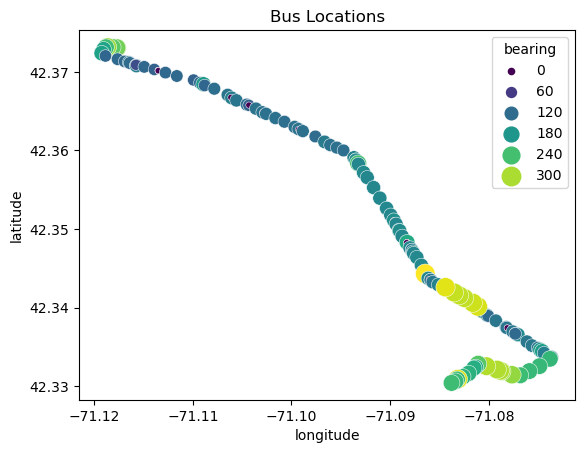

In [24]:
sns.scatterplot(x='longitude', y='latitude', data=df, hue='bearing', palette='viridis', size='bearing', sizes=(20, 200))
plt.title('Bus Locations')
plt.show()

<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

For the given info, we see from row 178 to 182, the bus is in transit. And the time interval is 10s, so it takes around 60s to complete a stop. And from the latitude and longitude infomation, we can get the distance. So we can get the estimated speed using distance/time.
The result of estimated speed is 7.5m/s.